<a href="https://colab.research.google.com/github/DataRecouver/Codes-DataScience-Python/blob/main/R%20Estat%C3%ADstica/Atividade_2_em_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Atividade 2 em R:

In [5]:
install.packages('psych')
install.packages('reshape2')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘mnormt’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘plyr’, ‘Rcpp’




In [6]:
library('readxl')
library('data.table')
library('datasets')
library(psych)
library('ggplot2')
library('scales')
library('reshape2')


Attaching package: ‘ggplot2’


The following objects are masked from ‘package:psych’:

    %+%, alpha



Attaching package: ‘scales’


The following objects are masked from ‘package:psych’:

    alpha, rescale



Attaching package: ‘reshape2’


The following objects are masked from ‘package:data.table’:

    dcast, melt




In [7]:
df <-as.data.table(mtcars)

In [8]:
head(df)

mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


In [9]:
str(df)

Classes ‘data.table’ and 'data.frame':	32 obs. of  11 variables:
 $ mpg : num  21 21 22.8 21.4 18.7 18.1 14.3 24.4 22.8 19.2 ...
 $ cyl : num  6 6 4 6 8 6 8 4 4 6 ...
 $ disp: num  160 160 108 258 360 ...
 $ hp  : num  110 110 93 110 175 105 245 62 95 123 ...
 $ drat: num  3.9 3.9 3.85 3.08 3.15 2.76 3.21 3.69 3.92 3.92 ...
 $ wt  : num  2.62 2.88 2.32 3.21 3.44 ...
 $ qsec: num  16.5 17 18.6 19.4 17 ...
 $ vs  : num  0 0 1 1 0 1 0 1 1 1 ...
 $ am  : num  1 1 1 0 0 0 0 0 0 0 ...
 $ gear: num  4 4 4 3 3 3 3 4 4 4 ...
 $ carb: num  4 4 1 1 2 1 4 2 2 4 ...
 - attr(*, ".internal.selfref")=<externalptr> 


A tabela Mtcars possui 11 colunas, todas com números, e um indice string, que refere-se ao nome e modelo de um carro. As colunas vs e am são booleanos, ou seja são valores qualitativos nominais

As colunas gears, Cyl e carb são variáveis quantitativas discretas. Já as variáveis mpg, drat,hp(horsepowers), disp, wt e qsec são variáveis quantitativas contínuas.

In [10]:
df$cyl <- factor(df$cyl)
df$gear <- factor(df$gear)
df$carb <- factor(df$carb)
df$vs <- factor(df$vs)
df$am <- factor(df$am)
df[ , gear := as.numeric(gear)]

In [11]:
summary(df)

      mpg        cyl         disp             hp             drat      
 Min.   :10.40   4:11   Min.   : 71.1   Min.   : 52.0   Min.   :2.760  
 1st Qu.:15.43   6: 7   1st Qu.:120.8   1st Qu.: 96.5   1st Qu.:3.080  
 Median :19.20   8:14   Median :196.3   Median :123.0   Median :3.695  
 Mean   :20.09          Mean   :230.7   Mean   :146.7   Mean   :3.597  
 3rd Qu.:22.80          3rd Qu.:326.0   3rd Qu.:180.0   3rd Qu.:3.920  
 Max.   :33.90          Max.   :472.0   Max.   :335.0   Max.   :4.930  
       wt             qsec       vs     am          gear       carb  
 Min.   :1.513   Min.   :14.50   0:18   0:19   Min.   :1.000   1: 7  
 1st Qu.:2.581   1st Qu.:16.89   1:14   1:13   1st Qu.:1.000   2:10  
 Median :3.325   Median :17.71                 Median :2.000   3: 3  
 Mean   :3.217   Mean   :17.85                 Mean   :1.688   4:10  
 3rd Qu.:3.610   3rd Qu.:18.90                 3rd Qu.:2.000   6: 1  
 Max.   :5.424   Max.   :22.90                 Max.   :3.000   8: 1  

# 1- Análise Univariada.

1- Escolha uma variável numérica e faça a análise univariada com as técnicas aprendidas até o momento. Interprete os resultados.


wt	Weight (1000 lbs)

A variável wt(Peso), foi a selecionada para ser analisada de forma univariada.

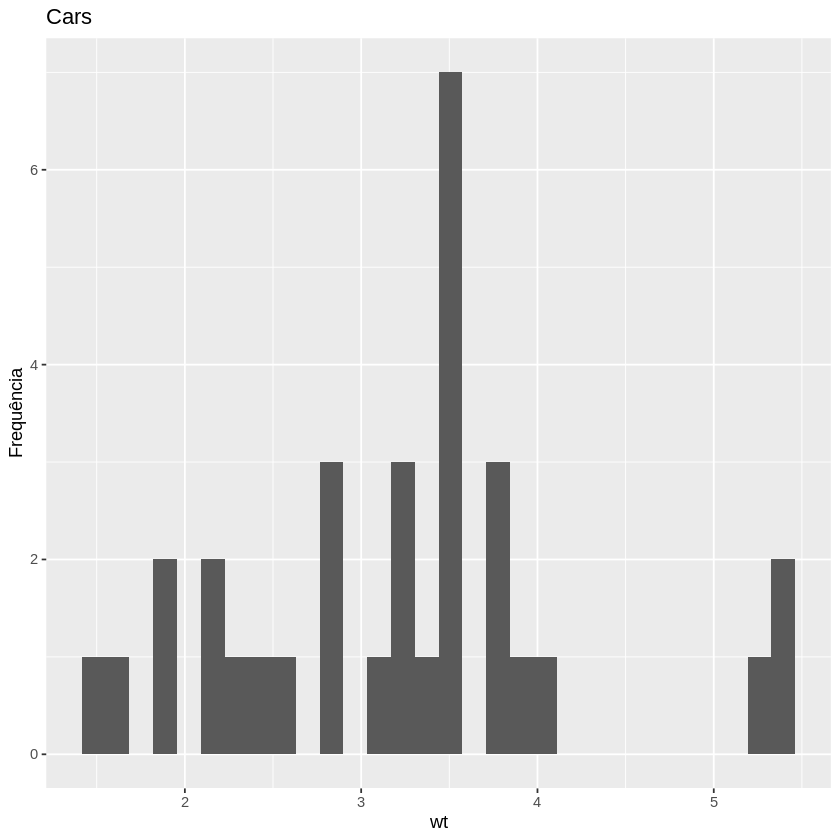

In [12]:
ggplot(df[!is.na(wt)], aes(x=wt)) + 
  geom_histogram(bins = 30) + 
  labs(x="wt", y="Frequência", title="Cars")

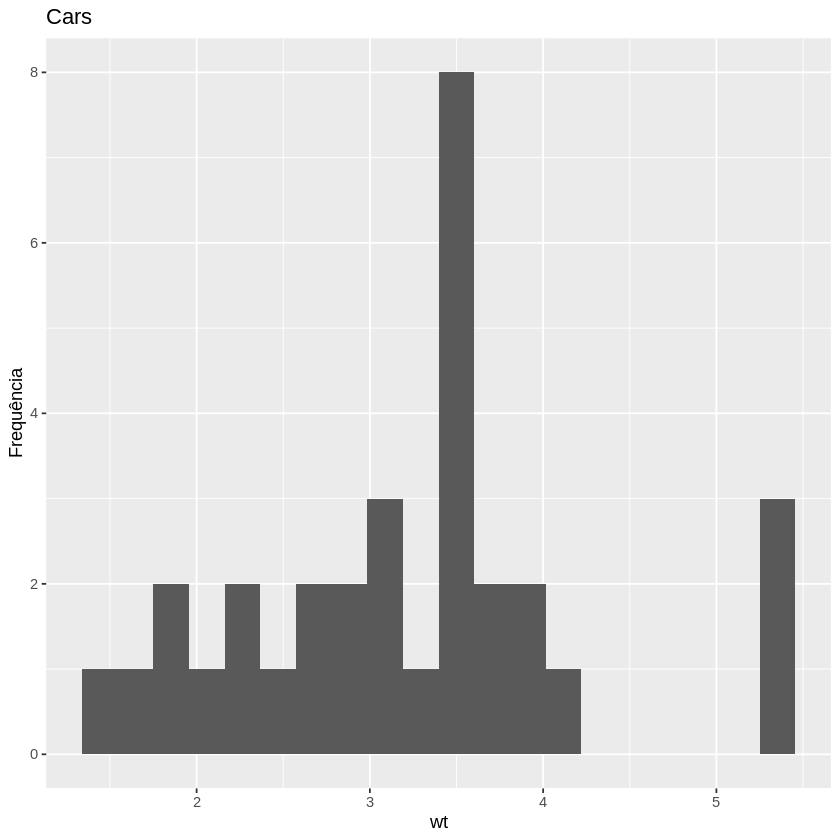

In [13]:
ggplot(df[!is.na(wt)], aes(x=wt)) + 
  geom_histogram(bins = 20) + 
  labs(x="wt", y="Frequência", title="Cars")

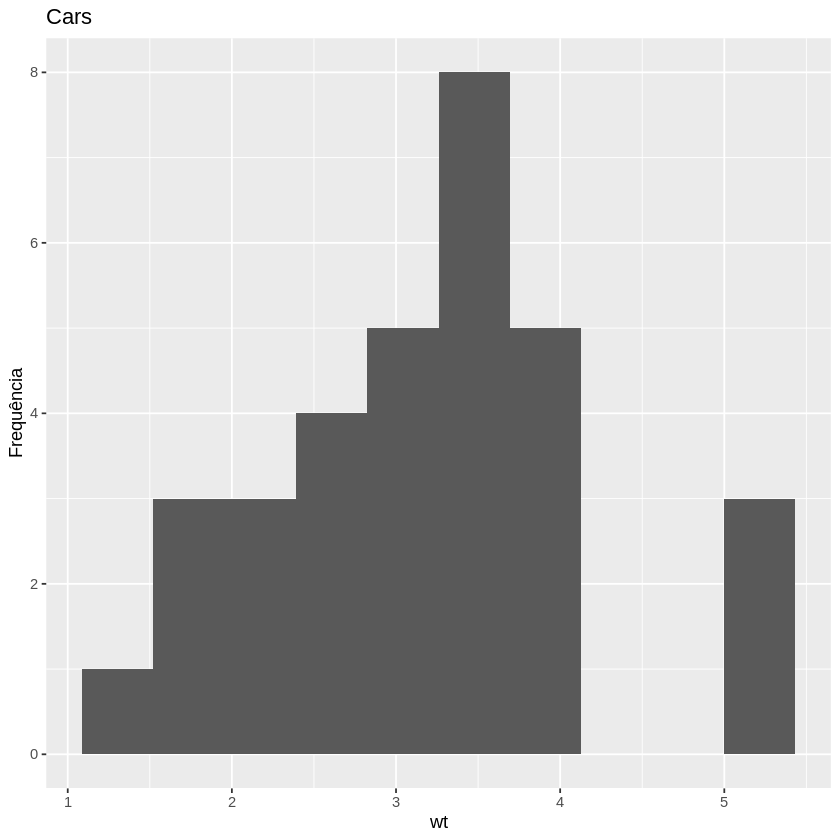

In [14]:
ggplot(df[!is.na(wt)], aes(x=wt)) + 
  geom_histogram(bins = 10) + 
  labs(x="wt", y="Frequência", title="Cars")

Podemos observar visualmente que os dados de WT se aproximam de uma distribuição normal, mas pode ser visualizado que há uma ausência de valores após a média.

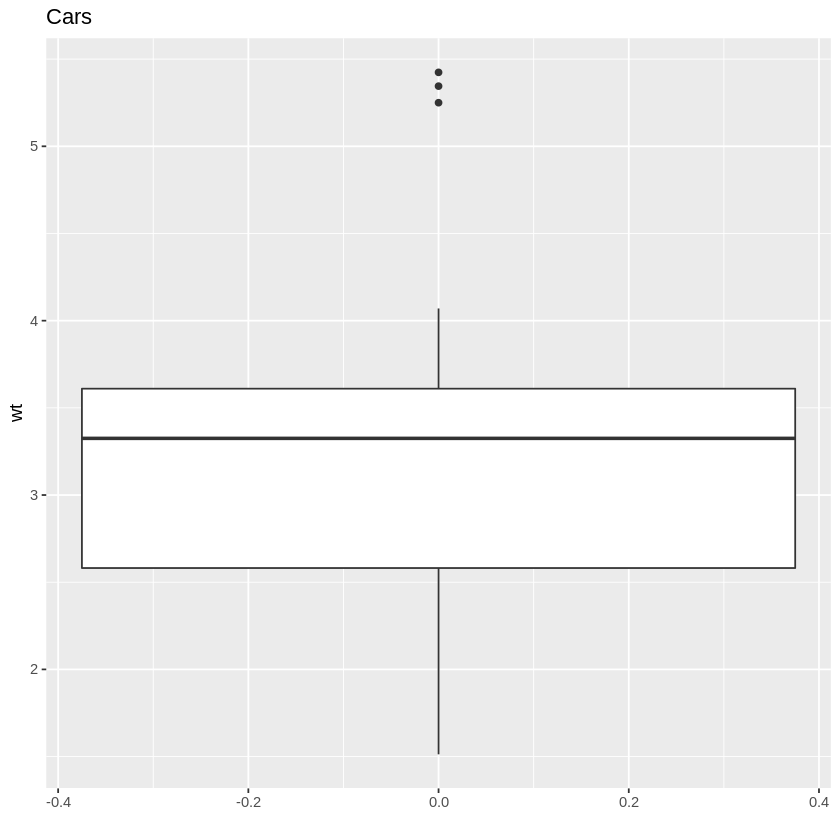

In [15]:
ggplot( df[!is.na(wt)] , aes(y=as.numeric(wt))) + 
  geom_boxplot() + 
  labs(x="", y="wt", title="Cars")

#2- Simetria.

2- Escolha uma (ou mais) abordagem adequada e avalie a simetria das variáveis numéricas.

A simetria da variável WT não é existe em sua condição original. Para tentar tornar a distribuição mais próxima da normal, devemos realizar algumas transformações.

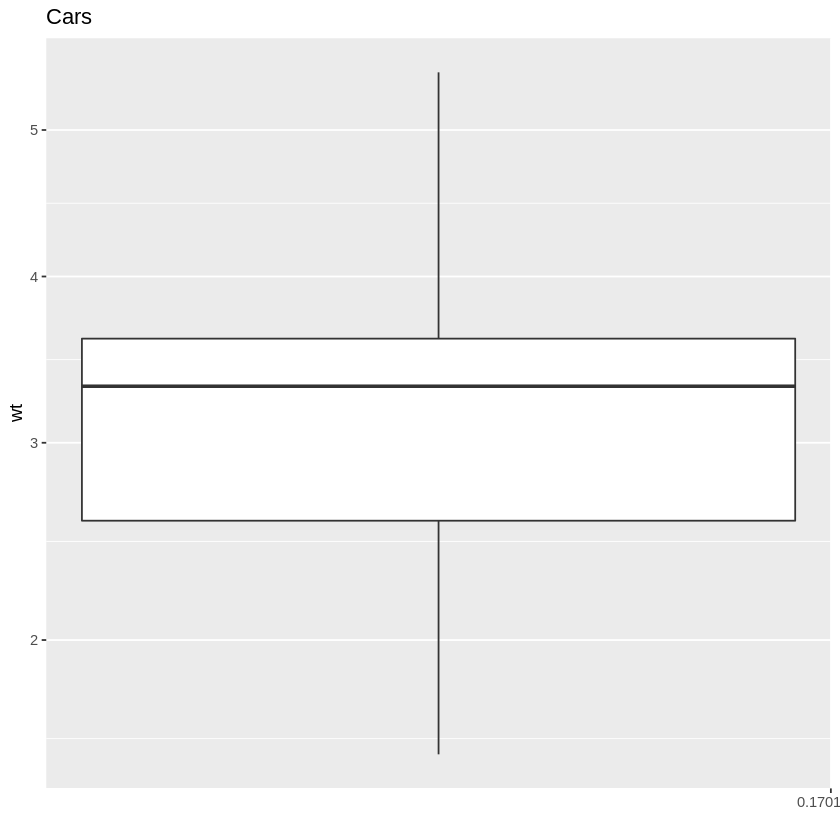

In [16]:
ggplot( df[!is.na(wt)] , aes(y=as.numeric(wt))) + 
  geom_boxplot() +
  scale_x_continuous(trans = 'sqrt') +
  scale_y_continuous(trans = 'sqrt') +
  labs(x="", y="wt", title="Cars")

3- Caso alguma variável quantitativa apresente assimetria, teste algumas opções de transformação e indique qual a mais adequada

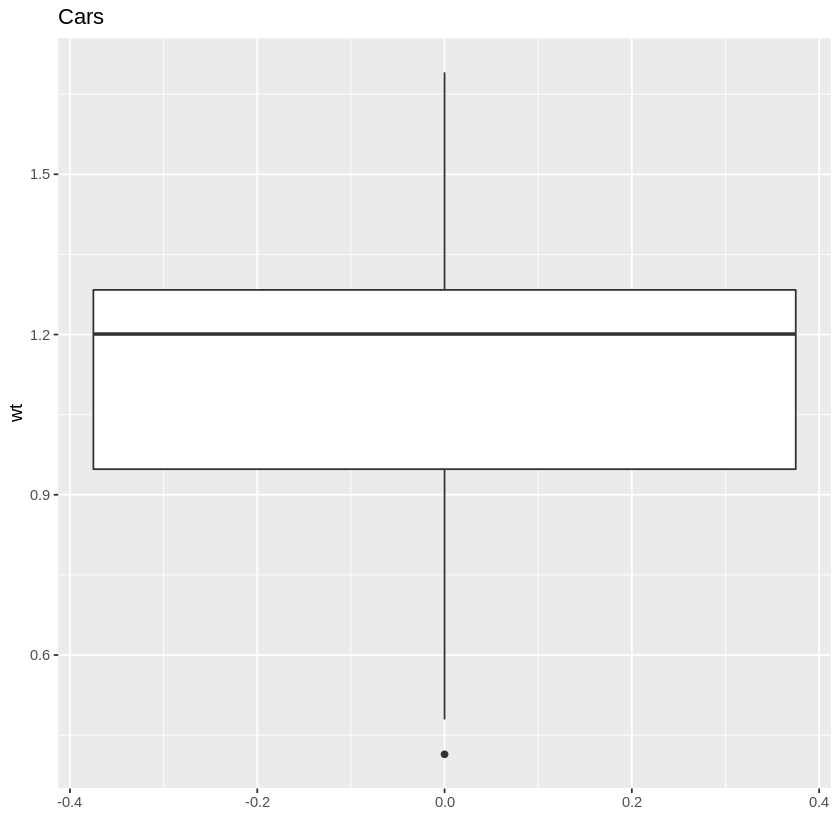

In [17]:
ggplot( df[!is.na(wt)] , aes(y=log(as.numeric(wt)))) + 
  geom_boxplot() +
#   scale_x_continuous(trans = 'log10') +
#   scale_y_continuous(trans = 'log10') +
  labs(x="", y="wt", title="Cars")

Warning message:
“Continuous x aesthetic -- did you forget aes(group=...)?”


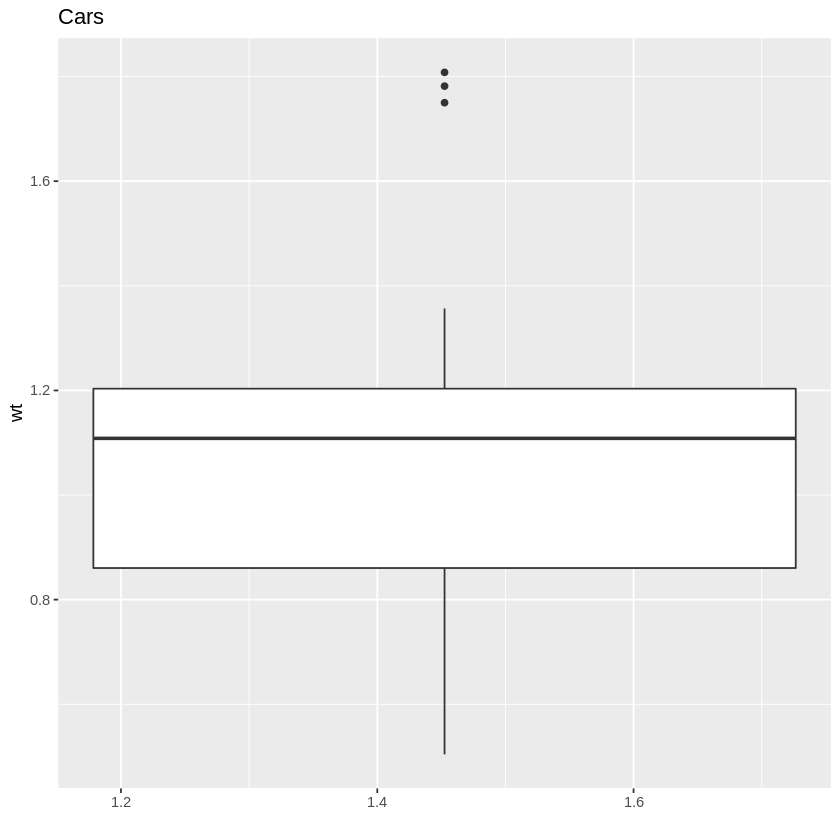

In [19]:
ggplot( df[!is.na(wt)] , aes(x =wt^(1/3),y=(as.numeric(wt)^1/3))) + 
  geom_boxplot() +
#   scale_x_continuous(trans = 'log10') +
#   scale_y_continuous(trans = 'log10') +
  labs(x="", y="wt", title="Cars")

Warning message:
“Continuous x aesthetic -- did you forget aes(group=...)?”


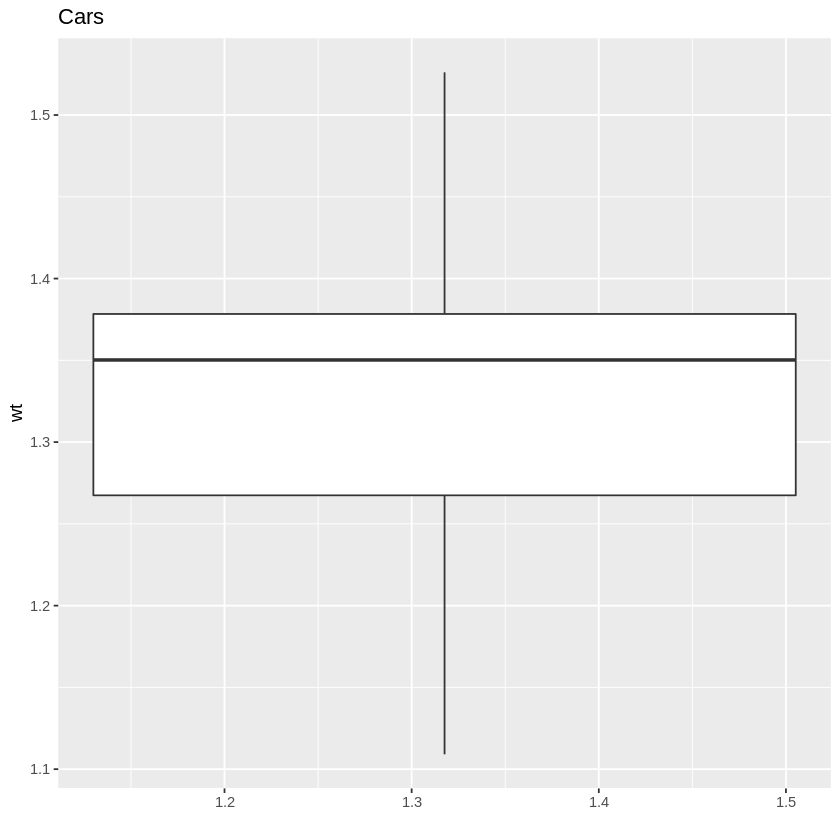

In [20]:
ggplot( df[!is.na(wt)] , aes(x =wt^(1/4), y=(as.numeric(wt)^(1/4)))) + 
  geom_boxplot() +
  labs(x="", y="wt", title="Cars")

Podemos ver pelo boxplot que os valores estão muito mais concentrados abaixo do segundo quartil e nenhuma das transformações foram efetivas para alterar esse resultado.

# Análise Bivariada de variáveis Qualitativas

4- Escolha duas variáveis qualitativas e faça a análise bivariada. Interprete os resultados.

Analisando a relação de motos em v com o número de marchas presentes no carro.



In [21]:
(tabela <- table(df$vs,df$gear))
(Total_linha<-margin.table(tabela,2))  # O argumento 2 define a marginal da coluna
(Total_coluna<-margin.table(tabela,1)) # O argumento 1 define a marginal da linha
tabFinal<-rbind(cbind(tabela,Total_coluna),c(Total_linha, sum(Total_coluna)))
dimnames(tabFinal)[[1]][3]<-"Total_linha" 
tabFinal

   
     1  2  3
  0 12  2  4
  1  3 10  1


 1  2  3 
15 12  5 


 0  1 
18 14 

,1,2,3,Total_coluna
0,12,2,4,18
1,3,10,1,14
Total_linha,15,12,5,32


Analisando a variável vs, podemos ver que a maior parte dos motores vs tem 4 marchas para frente e a maioria dos motores normais possuem 3 marchas para frente.

A probabilidade de um carro ter motor em V é de 14 em 32, ou seja 0,44. Essa probabilidade muda quando consideramos a variável de número de engrenagens. Podemos ver que essa relção se torna 0,2 , 0,83 e 0,2 para 1, 2 e 3 engrenagens respectivamente. Isso quer dizer que há dependência entre as duas variáveis.

# Análise bivariada para variáveis quantitativas

5- Escolha duas variáveis quantitativas e faça a análise bivariada. Interprete os resultado

Será analisado a relação de dependência entre a variável wt e hp.

In [22]:
cor(df$wt,as.numeric(df$hp))

[1] 0.6587479

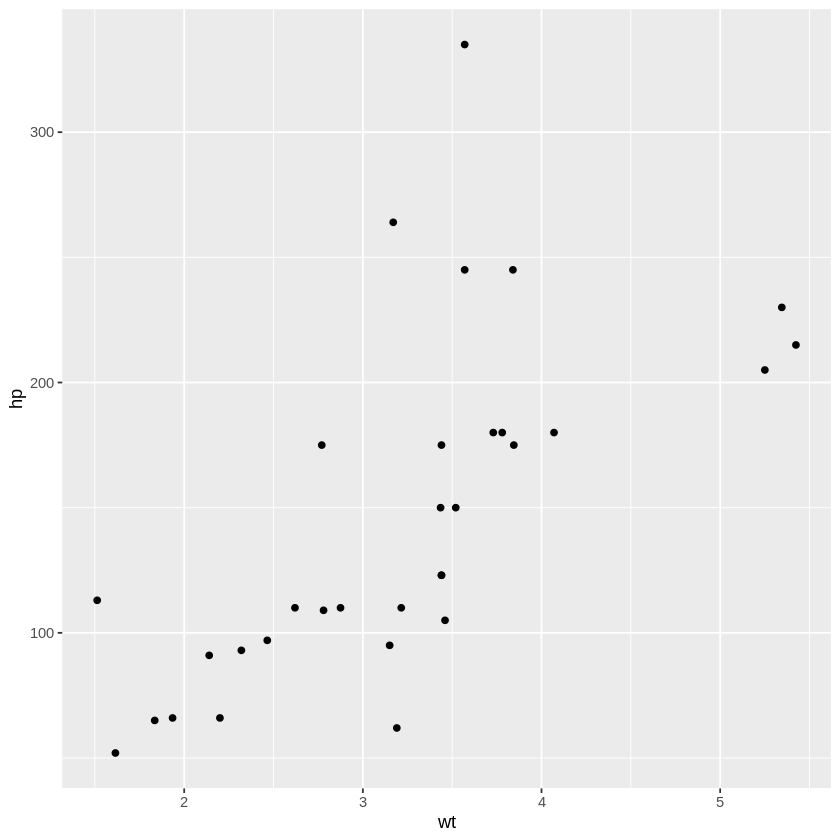

In [23]:
ggplot(df, aes(x=wt, y=hp)) +
  geom_point()

Pode-se notar uma correlação positiva relativamente forte. Ela é intuitivamente explicada já que carros mais pesados necessitam de mais potência para alcançar uma mesma velocidade de cruzeiro. Entretanto, a quantidade de cavalos também é influenciada pelo modelo do carro, que caso seja sport, tende a ser mais leve e mais potente, por isso que a dependência não é ainda mais forte.

# Análise bivariada para uma variável quantitativa e outra qualitativa

6- Escolha uma variável qualitativa e uma quantitativa e faça a análise bivariada. Interprete os resultados.

Vamos analisar a relação de dependência entre a variável wt e vs.

In [24]:
(varglobal <- var(df$wt,na.rm=T))
(varsim <- var(df[vs %in% 1]$wt,na.rm=T))
(varnao <- var(df[vs %in% 0]$wt,na.rm=T))
mean(c(varsim,varnao))

(varponderada <- (varsim*nrow(df[vs %in% 1]) + 
    varnao*nrow(df[vs %in% 0]))/(nrow(df[!is.na(vs)])))

[1] 0.957379

[1] 0.5112393

[1] 0.8172717

[1] 0.6642555

[1] 0.6833825

In [25]:
(r2 <- (varglobal-varponderada)/varglobal)

[1] 0.2861944

Nota-se que existe uma correlação fraca entre o tipo do motor e o peso do carro.

Iremos analisar a correlação do tipo do motor com a quantidade de cavalos de potência disponíveis

In [28]:
(varglobal <- var(df$hp,na.rm=T))
(varsim <- var(df[vs %in% 1]$hp,na.rm=T))
(varnao <- var(df[vs %in% 0]$hp,na.rm=T))
mean(c(varsim,varnao))

(varponderada <- (varsim*nrow(df[vs %in% 1]) + 
    varnao*nrow(df[vs %in% 0]))/(nrow(df[!is.na(vs)])))

[1] 4700.867

[1] 596.5549

[1] 3633.859

[1] 2115.207

[1] 2305.039

In [27]:
(r2 <- (varglobal-varponderada)/varglobal)

[1] 0.5096567

Podemos notar que mesmo com a correlação não sendo extremamente forte, o tipo do motor influência em 50% a variável hp.

# 1- 
Na área de ciência de dados, 60% dos profissionais são homens. Além disto, se o profissional é homem, existe uma probabilidade de 0,05 deste profissional ser estatístico, enquanto que para as mulheres esta probabilidade é de 0,02. Se um profissional é escolhido ao acaso e é estatístico(a), qual é a probabilidade de que seja mulher?

P(M|E) = P(M U E)/P(E) = (P(M)*P(E|M))/(P(E))

In [29]:
(0.4*0.02)/0.07

[1] 0.1142857

# 2-Em quais situações se devem utilizar as distribuições Binomial ou Normal?




Uma distribuição binomial deve ser usada quando à dois falores possíveis, "Sucesso" e "falha". Podemos ultrapassar a ideia e considerar valores específicos de uma variável como sucesso e os demais valores como falha, tornando a distribuição aplicável a diversos casos. Um caso comum da distribuição Binomial é para determinação da porcentagem de chance de um produto apresentar falha.

E para a distribuição Normal, ela pode ser utilizada em qualquer dataset desde que seja analisado uma AAS da população com um n grande o bastante, segundo o teorema central do limite(TCL). Caso a população tenha uma distribuição normal, o n mínimo tende a ser menor. Pode ser checado isso com base no desvio padrão dos dados.

#3- Sendo X uma variável aleatória contínua que segue distribuição Normal com média 20 e variância 25, qual a probabilidade de X ser maior que 30?

P(X>30) = Integral de 30 a + infinito da equanção da Gaussianaem que mi =20 e sigma=25.

Normalizando a curva, temos que Z = 0.4

In [30]:
pnorm(0.4,lower.tail = F)

[1] 0.3445783

# 4- Sendo X uma variável aleatória contínua que segue uma distribuição assimétrica à direita, qual o tamanho mínimo da amostra necessário para garantir que a distribuição amostral da média seguirá uma distribuição normal?

In [31]:
Z<-qnorm(0.975, mean = 0, sd = 1, lower.tail = TRUE, log.p = FALSE)
Z

[1] 1.959964

Considerando que o desvio padrão está normalizado, e que o erro é menor do que 10% do desvio padrão, temos:

In [32]:
((Z^2)*(1))/0.1


[1] 38.41459

Logo assim, precisamos de 39 amostras para considerar essa função como uma distribuição normal.